In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn 

In [5]:
ec= pd.read_csv("C:/Users\strms/Downloads/Ecom_Customers.csv")

<IPython.core.display.Javascript object>

In [3]:
ec.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ec.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

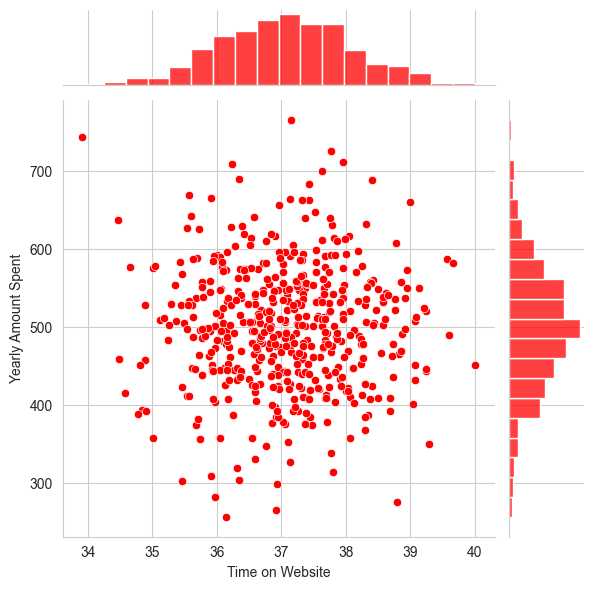

In [6]:
sns.set_style("whitegrid")
sns.jointplot(y="Yearly Amount Spent", x = "Time on Website", data = ec, color = "r")

<IPython.core.display.Javascript object>

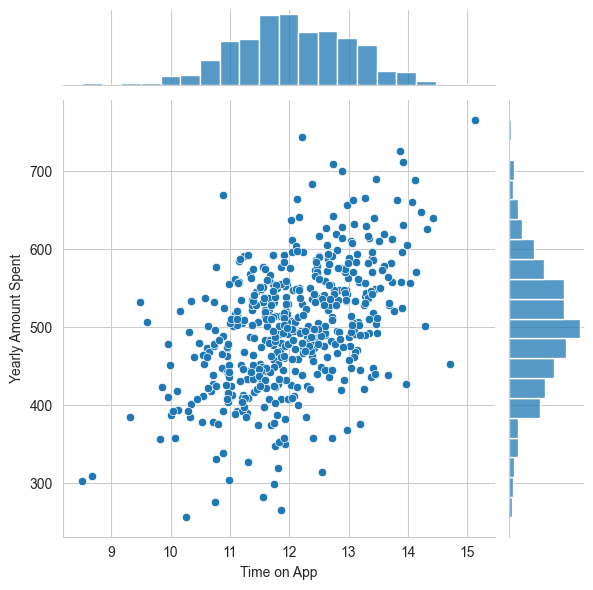

In [7]:
sns.jointplot(y = "Yearly Amount Spent", x = "Time on App", data = ec)

<Figure size 640x480 with 0 Axes>

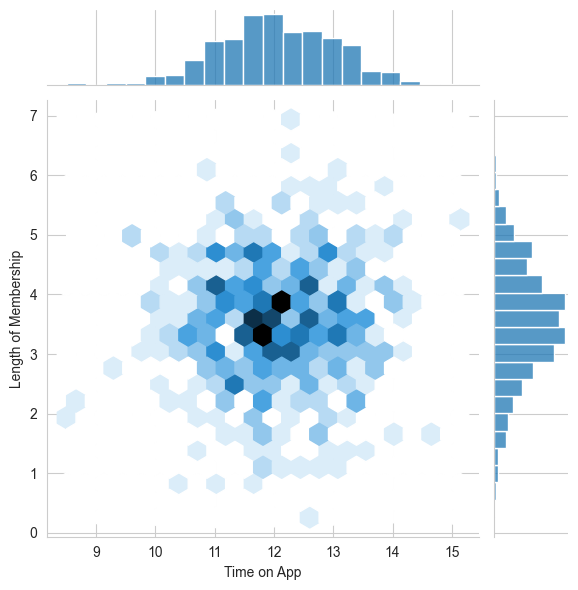

<Figure size 640x480 with 0 Axes>

In [38]:
sns.jointplot(x = "Time on App", y = "Length of Membership" , data= ec, kind = "hex")
plt.figure()

<Figure size 640x480 with 0 Axes>

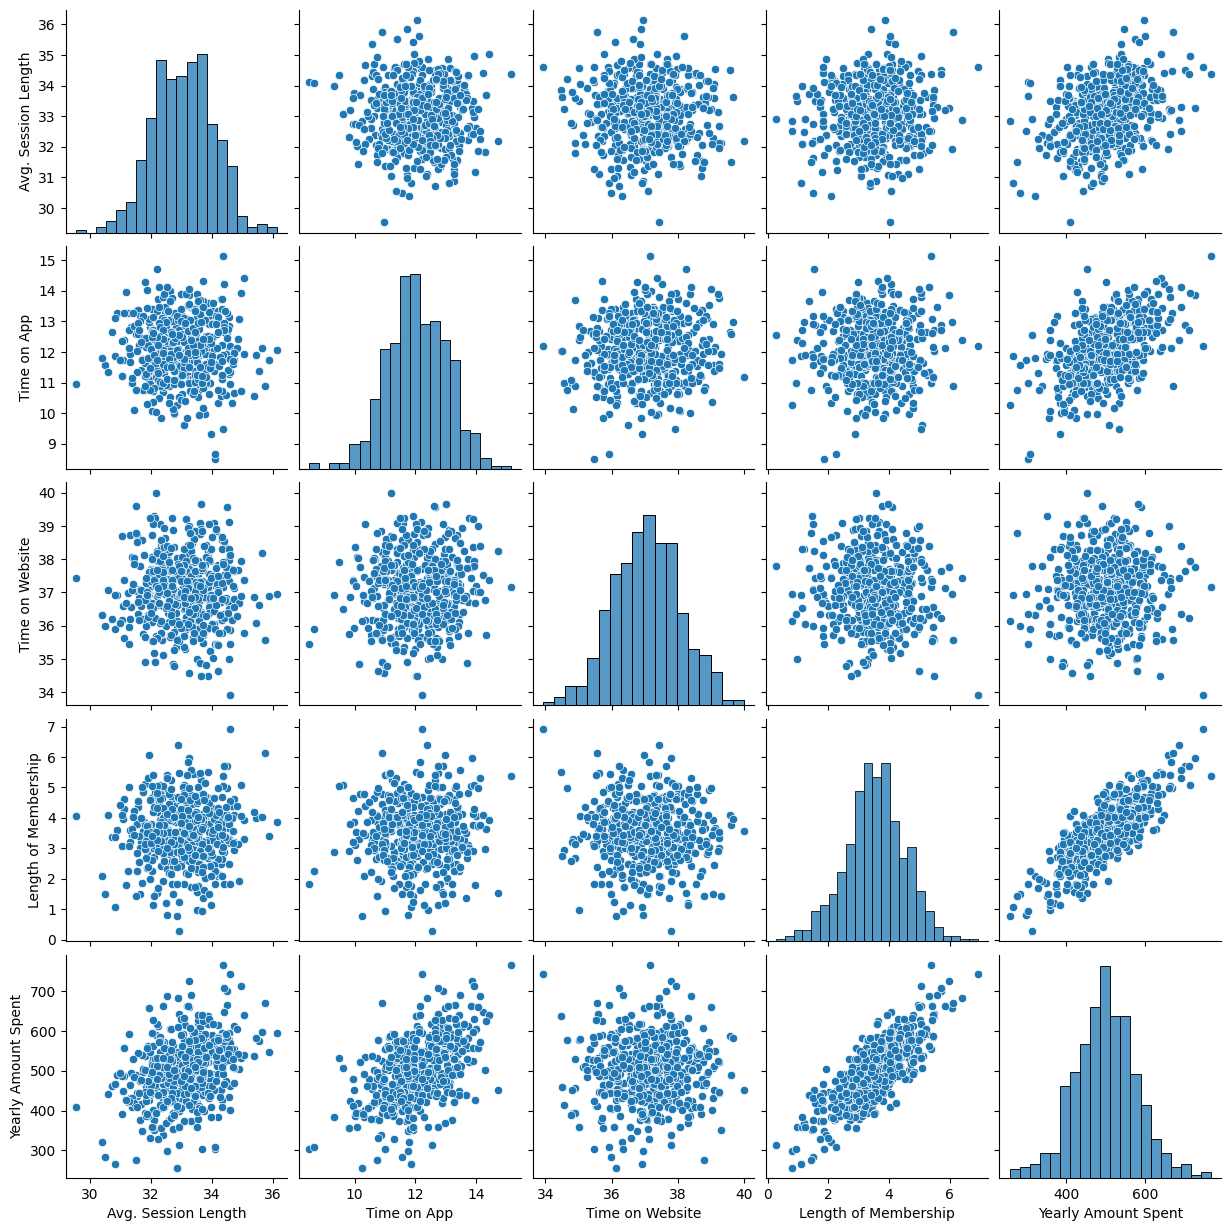

<Figure size 640x480 with 0 Axes>

In [5]:
sns.pairplot(data = ec)
plt.figure()

<IPython.core.display.Javascript object>

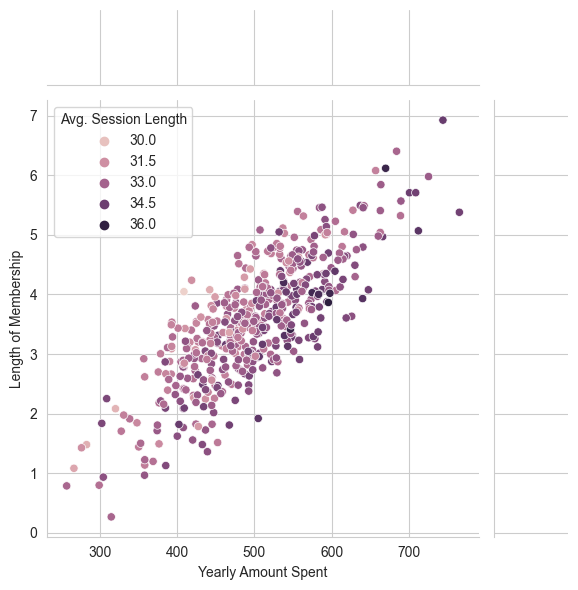

In [9]:
sns.jointplot(x = "Yearly Amount Spent", y = "Length of Membership", data = ec, hue = "Avg. Session Length" )

<IPython.core.display.Javascript object>

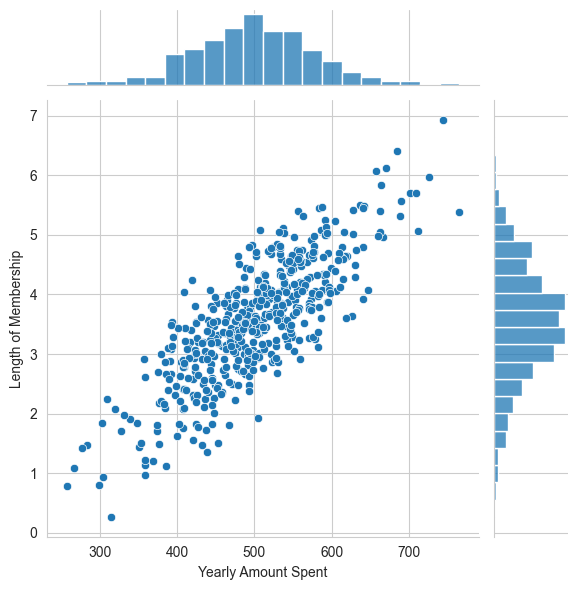

In [12]:
sns.jointplot(x = "Yearly Amount Spent", y = "Length of Membership", data = ec)

# Now time to train and test using machine learning

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
ec.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [41]:
X = ec[["Avg. Session Length", "Time on App","Time on Website", "Length of Membership"]]
y = ec["Yearly Amount Spent"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=100)

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
lr.coef_

array([25.74407858, 38.72279961,  0.40170603, 61.57442816])

<AxesSubplot:xlabel='Yearly Amount Spent'>

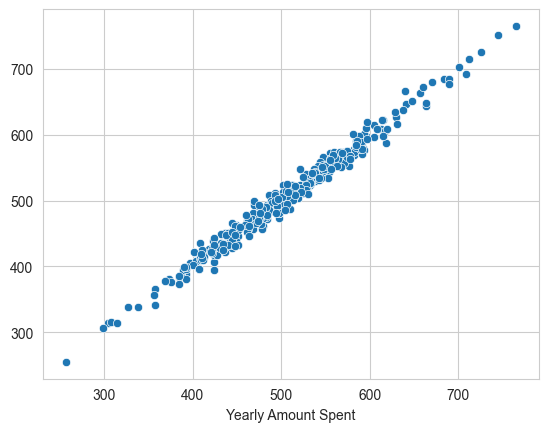

In [64]:
y_pred = lr.predict(X_test)
sns.scatterplot(y_test,y_pred)

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

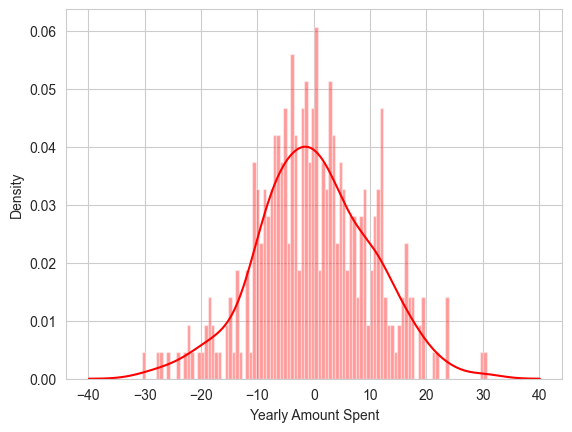

In [78]:
sns.distplot(y_test-y_pred, bins = 100, color = 'r')

In [74]:
print('MAE:' , metrics.mean_absolute_error(y_test, y_pred))
print('MSE:' , metrics.mean_squared_error(y_test, y_pred))
print('RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

<IPython.core.display.Javascript object>

MAE: 7.938028076647647


<IPython.core.display.Javascript object>

MSE: 102.23147734581717


<IPython.core.display.Javascript object>

RMSE: 10.110958280292584
